In [1]:
import pandas as pd 

In [10]:
import os 
os.getcwd()

'/home/maciektr/Programowanie/parallel_lab/cuda/Lab1'

In [12]:
df = pd.read_csv("./0_Simple/vectorAdd/res.txt")
df

,elements,time,type,threads_per_block,blocks_per_grid
0,5000,1.073056,gpu,32,157
1,5000,0.935136,gpu,64,79
2,5000,0.986880,gpu,128,40
3,5000,0.921024,gpu,256,20
4,5000,1.238368,gpu,512,10
5,5000,0.019456,cpu,256,20
6,50000,0.179200,cpu,256,196
7,50000,1.054368,gpu,32,1563
8,50000,0.188416,cpu,256,196
9,50000,1.076416,gpu,32,1563


<AxesSubplot:>

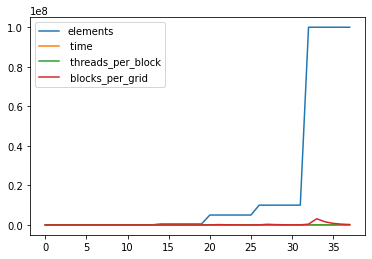

In [13]:
df.plot()